## Ali Inamdar

## Project 2 - Classification Algorithms

## Introduction to DataScience.

Impoorting all libraries required for this project.

In [ ]:
!pip install xgboost

In [ ]:
#Data Loading and Manilupation Libraries
import numpy as np
import pandas as pd
#Data Visualization Libraries
import matplotlib.pyplot as plt
import plotly.offline as py
import seaborn as sns
from plotly import graph_objs as go
#Model Training and Testing Library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Machine Learning Model Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
#Machine Learning Model Evaluation Libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.datasets import make_classification

## Data Pre-processing, Cleaning and Wrangling.

Importing the Dataset.


In [ ]:
data1 = pd.read_csv('/content/project2_data.csv')
data1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
#Getting information about the dataset.
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#Checking for null values throughout the datasaet and printing them out.
data1.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


Splitting the dataset into 'x' and 'y'.

In [ ]:
#Converting the target variable column into 'int' datatype.
data1['y'] = data1['y'].map({'yes': 1, 'no': 0})
data1['y'] = data1['y'].astype(int)

In [ ]:
X = data1[['age','campaign','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
y = data1['y']

In [ ]:
X

,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...
41183,73,1,999,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,999,-1.1,94.767,-50.8,1.028,4963.6
41185,56,2,999,-1.1,94.767,-50.8,1.028,4963.6
41186,44,1,999,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


## Models & Machine Learning Classifiers

Train , Test and Split

In [ ]:
#Using the train, test and split method to provide the suitable inputs for our machinne learning models.
#Splitting the dataset into a 70/30 test-train ratio.#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 1. Random Forest Classifier

In [ ]:
#Declaring the model
rf_classifier = RandomForestClassifier()

In [ ]:
#Fitting/Training our model with the Train dataset.
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Predicting
rf_predictions = rf_classifier.predict(X_test)

In [ ]:
#Calculating the accuracy of the Random Forest Model.
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [ ]:
#Confusion Matrix for the Random Forest Model.
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

In [ ]:
#Printing the Confusion Matrix
rf_conf_matrix

array([[10478,   490],
       [  966,   423]])

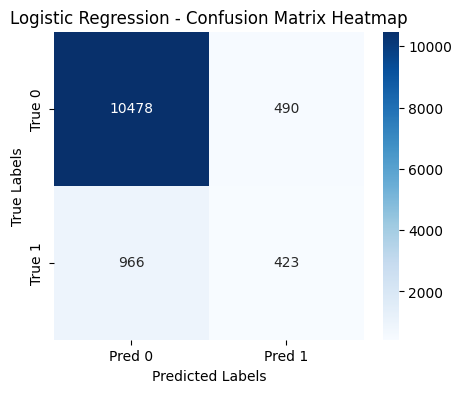

In [ ]:
#Plotting the Confusion Matrix Heatmap.
plt.figure(figsize=(5, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression - Confusion Matrix Heatmap")
plt.show()

In [ ]:
#Printing The Scores
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10968
           1       0.46      0.30      0.37      1389

    accuracy                           0.88     12357
   macro avg       0.69      0.63      0.65     12357
weighted avg       0.86      0.88      0.87     12357



In [ ]:
#Computing the  ROC curve and AUC for Random Forest Classifier
fpr, tpr, thresholds = roc_curve(y_test, rf_predictions)
rf_roc_auc = auc(fpr, tpr)

In [ ]:
#Printing The ROC Curve Value
rf_roc_auc

0.6299301088735658

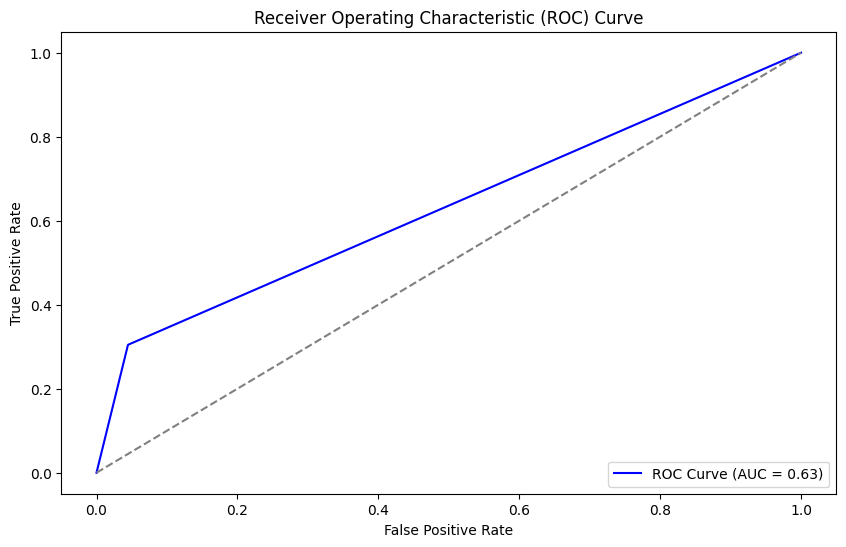

In [ ]:
#Plotting the ROC curve for the Random Forest Classifier
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Line of no-discrimination
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 2. Decision Tree Classifier

In [ ]:
#Using Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

In [ ]:
#Fitting the Decision Tree Classifier with our training dataset.
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Making Predictions
dt_predictions = dt_classifier.predict(X_test)

In [ ]:
#Calculating the accuracy for Decision Tree Classifier.
dt_accuracy = accuracy_score(y_test, dt_predictions)

In [ ]:
#Building the Confusion matrix for Decision Tree Classifier results.
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

In [ ]:
#Printing the confusuion matrix.
print("\nDecision Tree Classifier Confusion Matrix:")
dt_conf_matrix


Decision Tree Classifier Confusion Matrix:


array([[10405,   563],
       [ 1001,   388]])

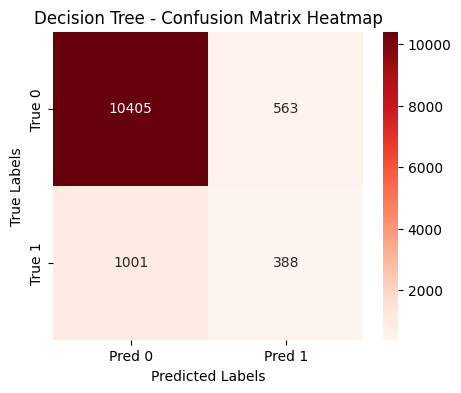

In [ ]:
#Plotting the Confusion Matrix Heatmap.
plt.figure(figsize=(5, 4))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Decision Tree - Confusion Matrix Heatmap")
plt.show()

In [ ]:
#Classification report for Decisio Tree Classifier.
print("\nDecision Tree Classifier:")
print(classification_report(y_test, dt_predictions))


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     10968
           1       0.41      0.28      0.33      1389

    accuracy                           0.87     12357
   macro avg       0.66      0.61      0.63     12357
weighted avg       0.86      0.87      0.86     12357



In [ ]:
#Computing the ROC curve and AUC for Decision Tree Classifier
fpr, tpr, thresholds = roc_curve(y_test, dt_predictions)
dt_roc_auc = auc(fpr, tpr)

In [ ]:
#Printing The ROC Curve Value
dt_roc_auc

0.6140032539191176

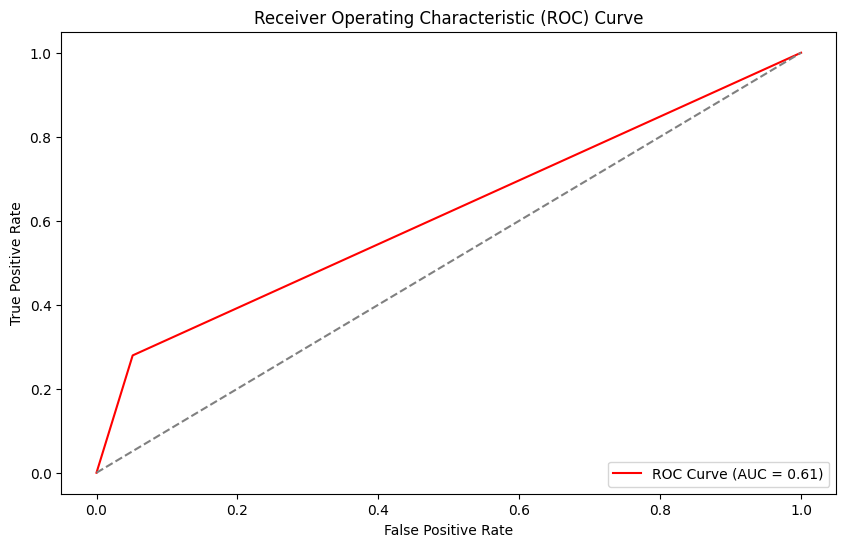

In [ ]:
#Plotting the ROC curve for the Decision Tree Classifier
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC = {dt_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Line of no-discrimination
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 3. K-Nearest Neighbors(KNN) Classifier

In [ ]:
#Using KNN Classifier.
knn_classifier = KNeighborsClassifier()

In [ ]:
#Fitting/Training the model with our training dataset.
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Making Predictions
knn_predictions = knn_classifier.predict(X_test)

In [ ]:
#Calculating the accuracy of KNN Classifier.
knn_accuracy = accuracy_score(y_test, knn_predictions)

In [ ]:
#Building the Confusion matrix for KNN Classifier.
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

In [ ]:
#Printing the Confusion matrix.
print("\nKNN Classifier Confusion Matrix:")
knn_conf_matrix


KNN Classifier Confusion Matrix:


array([[10613,   355],
       [ 1011,   378]])

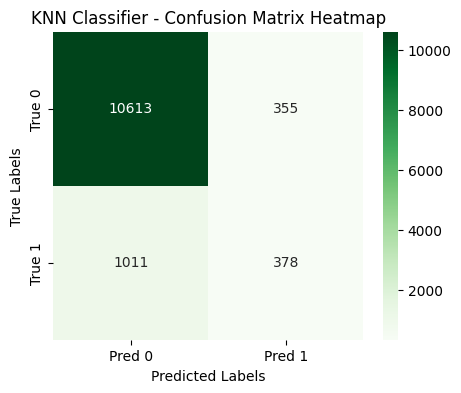

In [ ]:
#Heatmap for KNN Classifier.
plt.figure(figsize=(5, 4))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("KNN Classifier - Confusion Matrix Heatmap")
plt.show()

In [ ]:
#Classification report for KNN Classifier.
print("\nKNN Classifier:")
print(classification_report(y_test, knn_predictions))


KNN Classifier:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10968
           1       0.52      0.27      0.36      1389

    accuracy                           0.89     12357
   macro avg       0.71      0.62      0.65     12357
weighted avg       0.87      0.89      0.87     12357



In [ ]:
#Computing the ROC curve and AUC for KNN Classifier
fpr, tpr, thresholds = roc_curve(y_test, knn_predictions)
knn_roc_auc = auc(fpr, tpr)

In [ ]:
#Printing The ROC Curve Value
knn_roc_auc

0.6198856717283187

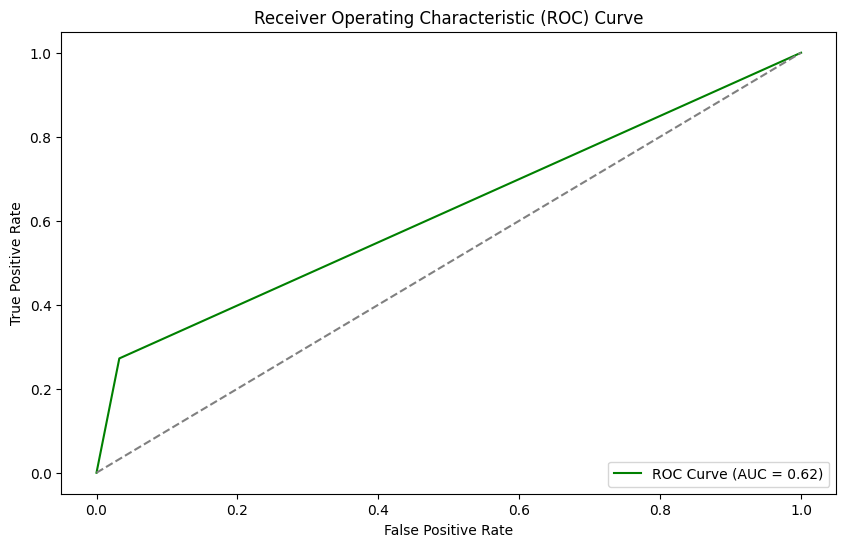

In [ ]:
#Plotting the ROC curve for the KNN Classifier
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC Curve (AUC = {knn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Line of no-discrimination
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 4. Logistic Regression Classifier

In [ ]:
#Using Logistic Regression Classifier
lr_classifier = LogisticRegression()

In [ ]:
#Fitting the model with our tarining dataset
lr_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
#Predicting
lr_predictions = lr_classifier.predict(X_test)

In [ ]:
#Calculating the accuracy of the Logistic Regression Model.
lr_accuracy = accuracy_score(y_test, lr_predictions)

In [ ]:
#Confusion Matrix for the  Logistic Regression Model.
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)

In [ ]:
#Printing the Confusion Matrix
lr_conf_matrix

array([[10851,   117],
       [ 1127,   262]])

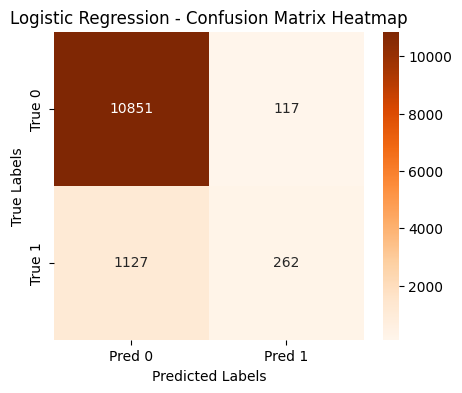

In [ ]:
#Plotting the Confusion Matrix Heatmap.
plt.figure(figsize=(5, 4))
sns.heatmap(lr_conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression - Confusion Matrix Heatmap")
plt.show()

In [ ]:
#Printing The Scores
print("Logistic Regression Classifier:")
print(classification_report(y_test, lr_predictions))

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10968
           1       0.69      0.19      0.30      1389

    accuracy                           0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [ ]:
#Computing the ROC curve and AUC for Logistic Regression Classifier
fpr, tpr, thresholds = roc_curve(y_test, lr_predictions)
lr_roc_auc = auc(fpr, tpr)

In [ ]:
#Printing The ROC Curve Value
lr_roc_auc

0.5889787569729652

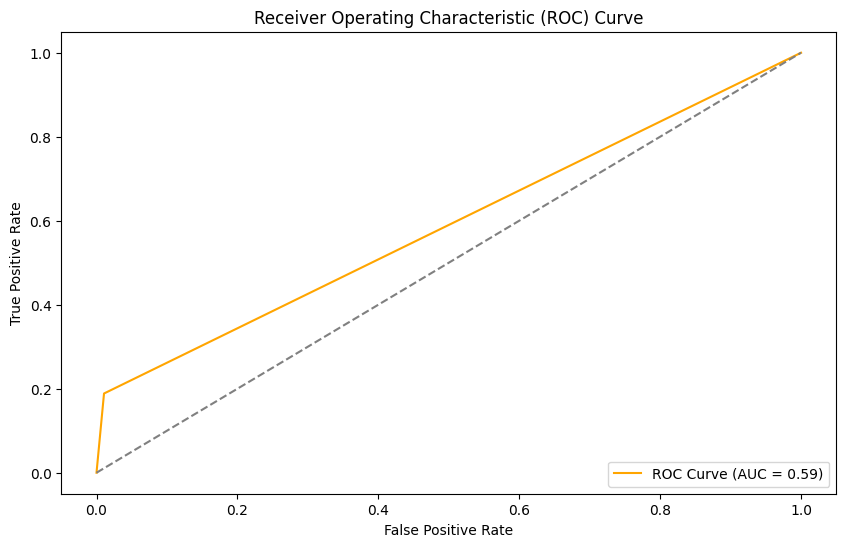

In [ ]:
#Plotting the ROC curve for the Logistic Regression Classifier
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {lr_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Line of no-discrimination
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 5. Naive Baye's Classifier

In [ ]:
#Using Navie Baye's Classifier
nb_classifier = GaussianNB()

In [ ]:
#Fitting the model with our training dataset
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Predicting
nb_predictions = nb_classifier.predict(X_test)

In [ ]:
#Calculating the accuracy of the Naive Baye's Model.
nb_accuracy = accuracy_score(y_test, nb_predictions)

In [ ]:
#Confusion Matrix for the Naive Baye's Model.
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)

In [ ]:
#Printing the Confusion Matrix
nb_conf_matrix

array([[9994,  974],
       [ 658,  731]])

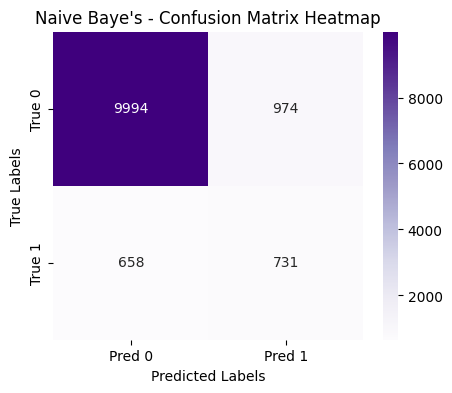

In [ ]:
#Plotting the Confusion Matrix Heatmap.
plt.figure(figsize=(5, 4))
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Naive Baye's - Confusion Matrix Heatmap")
plt.show()

In [ ]:
#Printing The Scores
print("Naive Baye's Classifier:")
print(classification_report(y_test, nb_predictions))

Naive Baye's Classifier:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     10968
           1       0.43      0.53      0.47      1389

    accuracy                           0.87     12357
   macro avg       0.68      0.72      0.70     12357
weighted avg       0.88      0.87      0.87     12357



In [ ]:
#Computing the ROC curve and AUC for Naive Baye's Classifier
fpr, tpr, thresholds = roc_curve(y_test, nb_predictions)
nb_roc_auc = auc(fpr, tpr)

In [ ]:
#Printing The ROC Curve Value
nb_roc_auc

0.7187370524581228

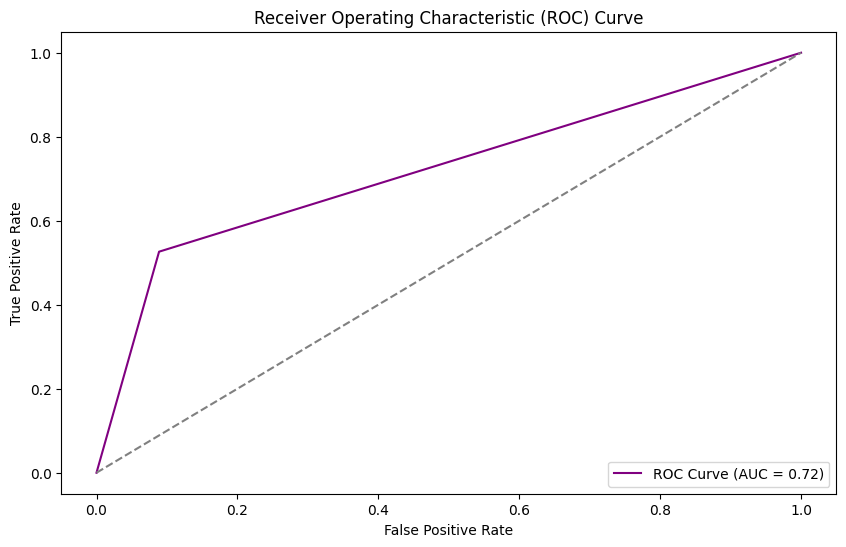

In [ ]:
#Plotting the ROC curve for the Naive Baye's Classifier
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='purple', label=f'ROC Curve (AUC = {nb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Line of no-discrimination
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 6. XGBoost Algorithm Classifier

In [ ]:
#Using XGBoost Algorithm
xgb_classifier = XGBClassifier()

In [ ]:
#Fitting the model with our training dataset
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Predicting
xgb_predictions = xgb_classifier.predict(X_test)

In [ ]:
#Calculating the accuracy of XGBost Algorithm
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

In [ ]:
#Confusion Matrix for the XGBoost Algorithm Model.
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)

In [ ]:
#Printing the Confusion Matrix
xgb_conf_matrix

array([[10697,   271],
       [ 1043,   346]])

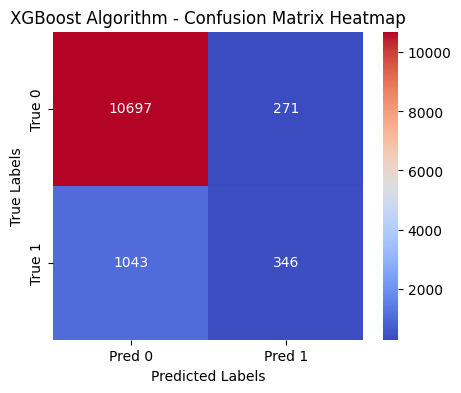

In [ ]:
#Plotting the Confusion Matrix Heatmap.
plt.figure(figsize=(5, 4))
sns.heatmap(xgb_conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("XGBoost Algorithm - Confusion Matrix Heatmap")
plt.show()

In [ ]:
#Printing The Scores
print("XGBoost Algorithm Classifier:")
print(classification_report(y_test, xgb_predictions))

XGBoost Algorithm Classifier:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10968
           1       0.56      0.25      0.34      1389

    accuracy                           0.89     12357
   macro avg       0.74      0.61      0.64     12357
weighted avg       0.87      0.89      0.88     12357



In [ ]:
#Computing the ROC curve and AUC for Naive Baye's Classifier
fpr, tpr, thresholds = roc_curve(y_test, xgb_predictions)
xgb_roc_auc = auc(fpr, tpr)

In [ ]:
#Printing The ROC Curve Value
xgb_roc_auc

0.6121959149176162

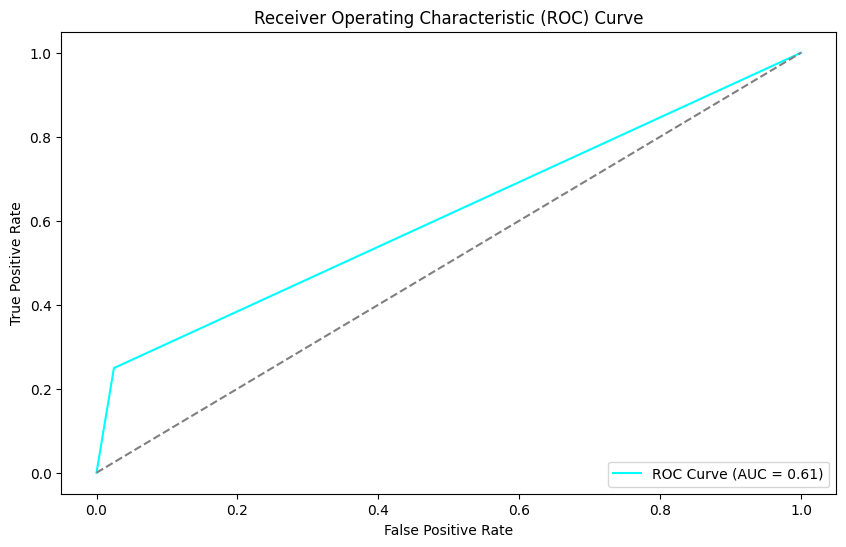

In [ ]:
#Plotting the ROC curve for the Naive Baye's Classifier
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='cyan', label=f'ROC Curve (AUC = {xgb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Line of no-discrimination
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Comparing the Accuracy of all the Machine Learning Models used:

In [ ]:
#Comparing Classifier Accuracies
print("\nComparison of Classifiers:")
print(f"Random Forest Classifier Accuracy: {rf_accuracy}")
print(f"\nDecision Tree Classifier Accuracy: {dt_accuracy}")
print(f"\nKNN Classifier Accuracy: {knn_accuracy}")
print(f"\nLogistic Regression Classifier Accuracy: {lr_accuracy}")
print(f"\nNaive Baye's Classifier Accuracy: {nb_accuracy}")
print(f"\nXGBoost Algorithm Classifier Accuracy: {xgb_accuracy}")


Comparison of Classifiers:
Random Forest Classifier Accuracy: 0.8821720482317714

Decision Tree Classifier Accuracy: 0.8734320627984139

KNN Classifier Accuracy: 0.8894553694262362

Logistic Regression Classifier Accuracy: 0.8993283159342883

Naive Baye's Classifier Accuracy: 0.8679291090070406

XGBoost Algorithm Classifier Accuracy: 0.8936635105608157


## ReRunning the Random Forest Classifier with HyperParameter Tuning.

In [ ]:
#Creating a Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
# Randomized search for tuning our model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=50,  # Number of parameter settings sampled
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=3,
                                   verbose=2,
                                   random_state=42)

In [ ]:
#Fitting our model with hyperparameter tuning
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
#Evaluating the model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
#Printing the list of best parameters
print("Best Parameters Found:\n", random_search.best_params_)

Best Parameters Found:
 {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'bootstrap': True}


In [ ]:
#Printing the accuracy of out hyperparameter ttuned model
print("Model Accuracy on Test Set:", accuracy)

Model Accuracy on Test Set: 0.8993283159342883


In [ ]:
#Making the confusion matrix for our model
hyper_conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
#Printing the confusion matrix
hyper_conf_matrix

array([[10853,   115],
       [ 1129,   260]])

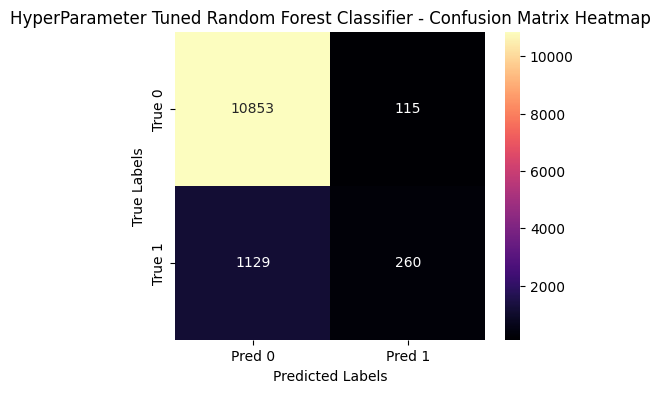

In [ ]:
#Plotting the Confusion Matrix Heatmap.
plt.figure(figsize=(5, 4))
sns.heatmap(hyper_conf_matrix, annot=True, fmt="d", cmap="magma", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("HyperParameter Tuned Random Forest Classifier - Confusion Matrix Heatmap")
plt.show()

In [ ]:
#Printing The Scores
print("HyperParameter Tuned Random Forest Classifier:")
print(classification_report(y_test, y_pred))

HyperParameter Tuned Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10968
           1       0.69      0.19      0.29      1389

    accuracy                           0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [ ]:
#Computing the ROC curve and AUC for HyperParameter Tuned Random Forest Classifier
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
hyper_roc_auc = auc(fpr, tpr)

In [ ]:
#Printing The ROC Curve Value
hyper_roc_auc

0.5883499888936674

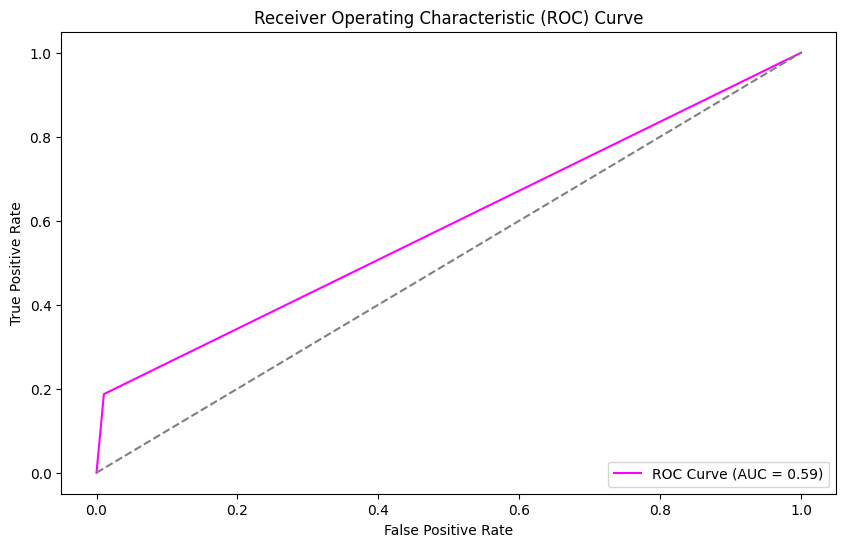

In [ ]:
#Plotting the ROC curve for the Naive Baye's Classifier
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='magenta', label=f'ROC Curve (AUC = {hyper_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Line of no-discrimination
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()